# Question: Predict Origin of cars using Keras

# Import Libraries

In [25]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Read Data

In [2]:
A = pd.read_csv(r"C:\Users\Aishwarya\OneDrive\Desktop\AI\Cars93.csv")
A.head(3)

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90


# Drop Discrete Column

In [26]:
A.nunique().sort_values()

Origin                 2
Man.trans.avail        2
AirBags                3
DriveTrain             3
Type                   6
Cylinders              6
Passengers             6
Turn.circle           14
Width                 16
Luggage.room          17
MPG.city              21
MPG.highway           22
RPM                   24
Rear.seat.room        25
EngineSize            26
Wheelbase             27
Manufacturer          32
Fuel.tank.capacity    38
Length                51
Horsepower            57
Rev.per.mile          78
Max.Price             79
Min.Price             79
Price                 81
Weight                81
dtype: int64

In [4]:
A = A.drop(labels=["id","Make","Model"],axis=1)

# Missing Data treatment

In [27]:
for i in cat:
    x=A[i].mode()[0]
    A[i]=A[i].fillna(x)
for i in con:
    x=A[i].mean()
    A[i]=A[i].fillna(x)

In [28]:
A.isna().sum()

Manufacturer          0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
dtype: int64

# Define X and Y

In [29]:
Y = A[['Origin']]
X = A.drop(labels=["Origin"],axis=1)

!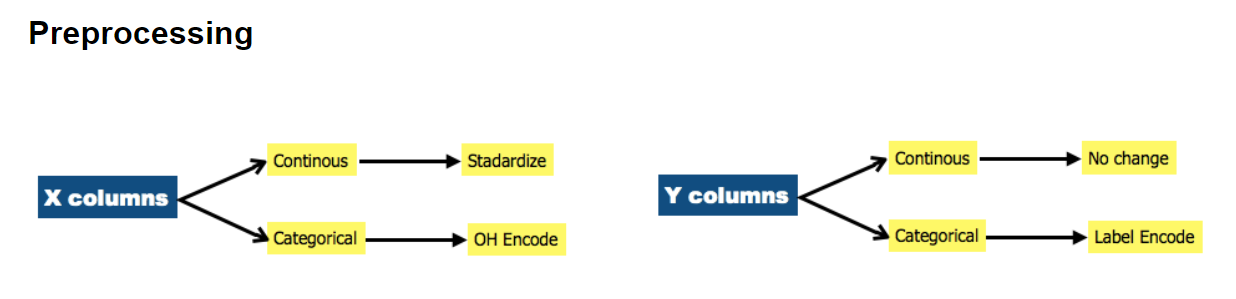

# Cat Con

In [30]:
cat = []
con = []

for i in X.columns:
    if (X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [31]:
cat

['Manufacturer',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail']

In [32]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

In [33]:
X1 = pd.get_dummies(A[cat])
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X2 = pd.DataFrame(mm.fit_transform(A[con]),columns=con)
Xnew = X2.join(X1)

In [34]:
Xnew

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,...,DriveTrain_Front,DriveTrain_Rear,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_No,Man.trans.avail_Yes
0,0.160207,0.155963,0.151179,0.322581,0.366667,0.170213,0.346939,0.925926,0.644764,0.224719,...,1,0,0,1,0,0,0,0,0,1
1,0.581395,0.486239,0.427184,0.096774,0.166667,0.468085,0.591837,0.629630,0.416838,0.494382,...,1,0,0,0,0,1,0,0,0,1
2,0.496124,0.398165,0.338419,0.161290,0.200000,0.382979,0.477551,0.629630,0.394251,0.432584,...,1,0,0,0,0,1,0,0,0,1
3,0.622739,0.555963,0.509015,0.129032,0.200000,0.382979,0.477551,0.629630,0.498973,0.668539,...,1,0,0,0,0,1,0,0,0,1
4,0.439276,0.414679,0.392510,0.225806,0.333333,0.531915,0.624490,0.703704,0.503080,0.668539,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.255814,0.225688,0.205270,0.064516,0.033333,0.319149,0.220408,0.259259,0.655031,0.668539,...,1,0,0,0,1,0,0,0,0,1
89,0.281654,0.231193,0.201110,0.193548,0.333333,0.212766,0.322449,0.740741,0.560575,0.522472,...,1,0,0,1,0,0,0,0,0,1
90,0.418605,0.291743,0.219140,0.096774,0.166667,0.382979,0.502041,0.740741,0.437372,0.522472,...,1,0,0,0,0,1,0,0,0,1
91,0.390181,0.280734,0.216366,0.193548,0.266667,0.276596,0.240816,0.592593,0.367556,0.370787,...,0,1,0,1,0,0,0,0,0,1


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ynew = le.fit_transform(Y[['Origin']])

~~~
Variation 1: ---------------- We split the data in training and
    testing set Variation 2: ---------------- Keras will split data for us.
~~~

# Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(Xnew , Ynew , test_size= 0.2 , random_state= 21)

# Neural Networks

In [38]:
from keras.models import Sequential     # model
from keras.layers import Dense          # dense states that every neuron is connected to each other

nn = Sequential()
nn.add(Dense(32,input_dim = len(Xnew.columns)))   # input layer
nn.add(Dense(100))                             # hidden layer
nn.add(Dense(1, activation= "sigmoid"))        # output layer

In [39]:
nn.compile(loss = "binary_crossentropy", metrics=["accuracy"])
model = nn.fit(Xnew , Ynew , validation_split= 0.2, epochs=15)

Epoch 1/15
3/3 [==============================] - 2s 235ms/step - loss: 0.6968 - accuracy: 0.5811 - val_loss: 0.7799 - val_accuracy: 0.4211
Epoch 2/15
3/3 [==============================] - 0s 39ms/step - loss: 0.6184 - accuracy: 0.6081 - val_loss: 0.6250 - val_accuracy: 0.5789
Epoch 3/15
3/3 [==============================] - 0s 35ms/step - loss: 0.5808 - accuracy: 0.7432 - val_loss: 0.7292 - val_accuracy: 0.4737
Epoch 4/15
3/3 [==============================] - 0s 32ms/step - loss: 0.5444 - accuracy: 0.7297 - val_loss: 0.7904 - val_accuracy: 0.4211
Epoch 5/15
3/3 [==============================] - 0s 34ms/step - loss: 0.5239 - accuracy: 0.7297 - val_loss: 0.6330 - val_accuracy: 0.4737
Epoch 6/15
3/3 [==============================] - 0s 34ms/step - loss: 0.4963 - accuracy: 0.7703 - val_loss: 0.6860 - val_accuracy: 0.5789
Epoch 7/15
3/3 [==============================] - 0s 34ms/step - loss: 0.4755 - accuracy: 0.7838 - val_loss: 0.7423 - val_accuracy: 0.5263
Epoch 8/15
3/3 [==========

# Plot Results

In [40]:
model.history

{'loss': [0.6967949867248535,
  0.6183846592903137,
  0.5807660222053528,
  0.544409990310669,
  0.5238615274429321,
  0.4963030517101288,
  0.4754773676395416,
  0.45554110407829285,
  0.4361904263496399,
  0.41237300634384155,
  0.38997167348861694,
  0.36951547861099243,
  0.3461052179336548,
  0.3245134949684143,
  0.30428630113601685],
 'accuracy': [0.5810810923576355,
  0.6081081032752991,
  0.7432432174682617,
  0.7297297120094299,
  0.7297297120094299,
  0.7702702879905701,
  0.7837837934494019,
  0.8108108043670654,
  0.8108108043670654,
  0.837837815284729,
  0.8648648858070374,
  0.8648648858070374,
  0.8648648858070374,
  0.8918918967247009,
  0.9054054021835327],
 'val_loss': [0.7799135446548462,
  0.6250337362289429,
  0.7292454242706299,
  0.7904457449913025,
  0.6330380439758301,
  0.6859829425811768,
  0.7423344850540161,
  0.6968970894813538,
  0.6193446516990662,
  0.6180559396743774,
  0.5312711000442505,
  0.5900943279266357,
  0.6341443657875061,
  0.6238450407981

In [41]:
tr_acc = model.history["accuracy"]
ts_acc = model.history["val_accuracy"]

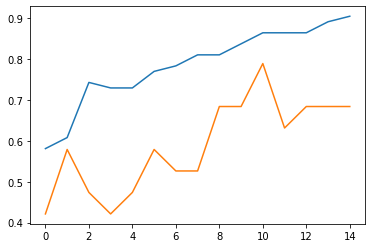

In [42]:
import matplotlib.pyplot as plt
plt.plot(tr_acc)
plt.plot(ts_acc)

In [43]:
nn.compile(loss="binary_crossentropy",metrics=["accuracy"])
model1 = nn.fit(Xnew,Ynew,validation_split=0.2,epochs=30,batch_size=20)

Epoch 1/30
4/4 [==============================] - 1s 131ms/step - loss: 0.3100 - accuracy: 0.8919 - val_loss: 0.6659 - val_accuracy: 0.5789
Epoch 2/30
4/4 [==============================] - 0s 25ms/step - loss: 0.2366 - accuracy: 0.9459 - val_loss: 0.5309 - val_accuracy: 0.8421
Epoch 3/30
4/4 [==============================] - 0s 25ms/step - loss: 0.2126 - accuracy: 0.9459 - val_loss: 0.4963 - val_accuracy: 0.8421
Epoch 4/30
4/4 [==============================] - 0s 26ms/step - loss: 0.1846 - accuracy: 0.9459 - val_loss: 0.5849 - val_accuracy: 0.6842
Epoch 5/30
4/4 [==============================] - 0s 22ms/step - loss: 0.1671 - accuracy: 0.9730 - val_loss: 0.5366 - val_accuracy: 0.7368
Epoch 6/30
4/4 [==============================] - 0s 23ms/step - loss: 0.1462 - accuracy: 0.9865 - val_loss: 0.6071 - val_accuracy: 0.5789
Epoch 7/30
4/4 [==============================] - 0s 24ms/step - loss: 0.1363 - accuracy: 0.9730 - val_loss: 0.6318 - val_accuracy: 0.5789
Epoch 8/30
4/4 [==========

In [44]:
tr_acc = model1.history["accuracy"]
ts_acc = model1.history["val_accuracy"]

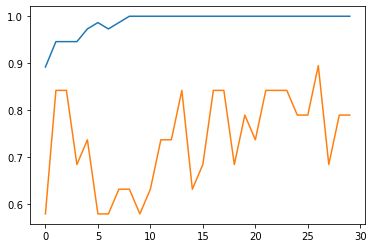

In [45]:
plt.plot(tr_acc)
plt.plot(ts_acc)

#### for Epochh 7 we got Training Acc of : 0.9865 and Testing_accuracy: 0.9474

In [46]:
pred =nn.predict(Xnew)

3/3 [==============================] - 0s 4ms/step


In [47]:
Q = []
for i in nn.predict(Xnew):
    if(i[0]<0.5):
        Q.append(0)
    else:
        Q.append(1)

3/3 [==============================] - 0s 3ms/step


In [49]:
A["Origin_pred"] = le.inverse_transform(Q)         # transforming Y to its original form

In [50]:
A[["Origin_pred"]].head(15)        # this is our final predicted Origin of Cars

,Origin_pred
0,non-USA
1,non-USA
2,non-USA
3,non-USA
4,non-USA
5,USA
6,USA
7,USA
8,USA
9,USA


In [51]:
A[["Origin"]].head(15)

,Origin
0,non-USA
1,non-USA
2,non-USA
3,non-USA
4,non-USA
5,USA
6,USA
7,USA
8,USA
9,USA
